In [406]:
# To display all outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [407]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import re

# File to Load (Remember to Change These)
school_data_to_load = "Resources/schools_complete.csv"
student_data_to_load = "Resources/students_complete.csv"

# Read School and Student Data File and store into Pandas DataFrames
school_data = pd.read_csv(school_data_to_load)
student_data = pd.read_csv(student_data_to_load)

# Combine the data into a single dataset.  
school_data_complete = pd.merge(student_data, school_data, how="left", on=["school_name", "school_name"])

## District Summary

* Calculate the total number of schools

* Calculate the total number of students

* Calculate the total budget

* Calculate the average math score 

* Calculate the average reading score

* Calculate the percentage of students with a passing math score (70 or greater)

* Calculate the percentage of students with a passing reading score (70 or greater)

* Calculate the percentage of students who passed math **and** reading (% Overall Passing)

* Create a dataframe to hold the above results

* Optional: give the displayed data cleaner formatting

In [408]:
#Note: School ID is the unique identifier for a student NOT the name (There are many students of the same name)
#Each school has a Budget
#Aggregate the dataframes to get the mean, sum, and unique counts
#Query DF with specific condition and then aggregate to get the unique counts
#Store in a DF, add proper column names
# Appropriate Display
# Beautify Display

#Construct a 1 column DF with required values as rows
District_Summary = pd.DataFrame(\
pd.concat([school_data_complete.aggregate({'School ID':'nunique', 'Student ID':'nunique', 'math_score':'mean', 'reading_score':'mean'}),\
pd.Series([school_data_complete.groupby(['School ID'] ).agg({'budget':'first'}).sum()[0],\
         100*school_data_complete.query('math_score >= 70')['School ID'].aggregate('count', axis=0)/school_data_complete.shape[0],\
         100*school_data_complete.query('reading_score >= 70')['School ID'].aggregate('count', axis=0)/school_data_complete.shape[0],\
         100*school_data_complete.query('math_score >= 70 & reading_score >= 70')['School ID'].aggregate('count', axis=0)/school_data_complete.shape[0]])]).reset_index(drop=True))

#Take transform
District_Summary = District_Summary.T
#Change Column names
District_Summary.columns = ['Total Schools','Total Students', 'Average Math Score', 'Average Reading Score','Total Budget', '% Passing Math','% Passing Reading','% Overall Passing']

#Change the order of the columns for display
District_Summary = District_Summary[['Total Schools','Total Students', 'Total Budget','Average Math Score', 'Average Reading Score', '% Passing Math','% Passing Reading','% Overall Passing']]
#Formatting for display for the required columns
District_Summary.loc[:, ['Total Schools', 'Total Students', 'Total Budget']] = District_Summary.apply({'Total Schools': lambda x: "{:,.0f}".format(x), 'Total Students': lambda x: "{:,.0f}".format(x), 'Total Budget': lambda x: "${:,.2f}".format(x)})

District_Summary



,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
0,15,"39,170","$24,649,428.00",78.985371,81.87784,74.980853,85.805463,65.172326


## School Summary
* Create an overview table that summarizes key metrics about each school, including:
  * School Name
  * School Type
  * Total Students
  * Total School Budget
  * Per Student Budget
  * Average Math Score
  * Average Reading Score
  * % Passing Math
  * % Passing Reading
  * % Overall Passing (The percentage of students that passed math **and** reading.)
  
* Create a dataframe to hold the above results

In [409]:
school_summary = school_data_complete.groupby('school_name').aggregate({'type':'first', 'Student ID':'count', 'budget': 'first',\
                                                      'math_score':'mean', 'reading_score':'mean'})

school_summary.columns = ['School Type', 'Total Students', 'Total School Budget', 'Average Math Score','Average Reading Score']
#Add "Per Student Budget" as 'Total School Budget'/'Total Students'

school_summary['Per Student Budget'] = school_summary.apply(lambda x: x['Total School Budget']/x['Total Students'], axis=1)

#% Passing Math, % Passing Reading, % Overall Passing'
#Create DFs with one column for each of  % Passing Math / % Passing Reading / % Passing Reading
#Concatenate these DFs to the school_summary DF based on index
#% Passing Math
math_pass_DF = school_data_complete.loc[school_data_complete.math_score >= 70].groupby('school_name')['Student ID'].count().reset_index()             
math_perc_pass_DF = pd.DataFrame(math_pass_DF.apply(lambda x: 100*x['Student ID']/school_summary.loc[x['school_name'], 'Total Students'], axis=1)) 
math_perc_pass_DF.index = math_pass_DF['school_name']
math_perc_pass_DF.columns = ['% Passing Math']

#% Passing Reading
reading_pass_DF = school_data_complete.loc[school_data_complete.reading_score >= 70].groupby('school_name')['Student ID'].count().reset_index()             
reading_perc_pass_DF = pd.DataFrame(reading_pass_DF.apply(lambda x: 100*x['Student ID']/school_summary.loc[x['school_name'], 'Total Students'], axis=1)) 
reading_perc_pass_DF.index = reading_pass_DF['school_name']
reading_perc_pass_DF.columns = ['% Passing Reading']


#% Overall Passing
overall_pass_DF = school_data_complete.loc[(school_data_complete.math_score >= 70)&(school_data_complete.reading_score >= 70)].groupby('school_name')['Student ID'].count().reset_index()             
overall_perc_pass_DF = pd.DataFrame(overall_pass_DF.apply(lambda x: 100*x['Student ID']/school_summary.loc[x['school_name'], 'Total Students'], axis=1)) 
overall_perc_pass_DF.index = overall_pass_DF['school_name']
overall_perc_pass_DF.columns = ['% Overall Passing']

#Concatenate math_pass_DF, reading_pass_DF and overall_pass_DF to school_summary
school_summary = pd.concat([school_summary, math_perc_pass_DF, reading_perc_pass_DF, overall_perc_pass_DF], axis=1)

#Reorder the column names as per the requirement
school_summary = school_summary[['School Type', 'Total Students', 'Total School Budget','Per Student Budget', 'Average Math Score', 'Average Reading Score', '% Passing Math', '% Passing Reading', '% Overall Passing']]       

#Remove Index name (for the display)
school_summary.index.name = None

#Take school_summary before formatting (used later in the upcoming task)
school_summary_nf = school_summary.copy()

#Formatting
school_summary[['Total School Budget', 'Per Student Budget']] = school_summary[['Total School Budget', 'Per Student Budget']].applymap(lambda x: "${:,.2f}".format(x))

#Display
school_summary

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476
Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,54.289887
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508
Holden High School,Charter,427,"$248,087.00",$581.00,83.803279,83.814988,92.505855,96.252927,89.227166
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172
Pena High School,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,94.594595,95.945946,90.540541


## Top Performing Schools (By % Overall Passing)
* Sort and display the top five performing schools by % overall passing.

In [410]:
sorted_dsc_school_summary = school_summary.sort_values(by='% Overall Passing', ascending=False)
sorted_dsc_school_summary.head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769
Thomas High School,Charter,1635,"$1,043,130.00",$638.00,83.418349,83.848930,93.272171,97.308869,90.948012
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455
Wilson High School,Charter,2283,"$1,319,574.00",$578.00,83.274201,83.989488,93.867718,96.539641,90.582567
Pena High School,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,94.594595,95.945946,90.540541


## Bottom Performing Schools (By % Overall Passing)
* Sort and display the five worst-performing schools by % overall passing.

In [411]:
sorted_asc_school_summary = school_summary.sort_values(by='% Overall Passing')
sorted_asc_school_summary.head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Rodriguez High School,District,3999,"$2,547,363.00",$637.00,76.842711,80.744686,66.366592,80.220055,52.988247
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172


## Math Scores by Grade
* Create a table that lists the average Reading Score for students of each grade level (9th, 10th, 11th, 12th) at each school.

  * Create a pandas series for each grade. Hint: use a conditional statement.
  
  * Group each series by school
  
  * Combine the series into a dataframe
  
  * Optional: give the displayed data cleaner formatting

In [412]:
#The above steps can be used; However, the below option is better
#Create a multi-group object on 'school_name' and 'grade'
school_grade_gp = school_data_complete.groupby(['school_name', 'grade']) 
#Aggregate math score as mean, and unstack the grade index as column. Finally rearrange the columns
school_math_grade_DF = school_grade_gp['math_score'].mean().unstack(level=1)[['9th', '10th','11th','12th']]
#Remove both column and index names
school_math_grade_DF.columns.name, school_math_grade_DF.index.name = None, None
#Display
school_math_grade_DF

,9th,10th,11th,12th
Bailey High School,77.083676,76.996772,77.515588,76.492218
Cabrera High School,83.094697,83.154506,82.765560,83.277487
Figueroa High School,76.403037,76.539974,76.884344,77.151369
Ford High School,77.361345,77.672316,76.918058,76.179963
Griffin High School,82.044010,84.229064,83.842105,83.356164
Hernandez High School,77.438495,77.337408,77.136029,77.186567
Holden High School,83.787402,83.429825,85.000000,82.855422
Huang High School,77.027251,75.908735,76.446602,77.225641
Johnson High School,77.187857,76.691117,77.491653,76.863248
Pena High School,83.625455,83.372000,84.328125,84.121547


## Reading Score by Grade 
* Perform the same operations as above for reading scores

In [413]:
#The above steps can be used; However, the below option is better
#Create a multi-group object on 'school_name' and 'grade'
school_grade_gp = school_data_complete.groupby(['school_name', 'grade']) 
#Aggregate reading score as mean, and unstack the grade index as column. Finally rearrange the columns
school_reading_grade_DF = school_grade_gp['reading_score'].mean().unstack(level=1)[['9th', '10th','11th','12th']]
#Remove both column and index names
school_reading_grade_DF.columns.name, school_reading_grade_DF.index.name = None, None
#Display
school_reading_grade_DF

,9th,10th,11th,12th
Bailey High School,81.303155,80.907183,80.945643,80.912451
Cabrera High School,83.676136,84.253219,83.788382,84.287958
Figueroa High School,81.198598,81.408912,80.640339,81.384863
Ford High School,80.632653,81.262712,80.403642,80.662338
Griffin High School,83.369193,83.706897,84.288089,84.013699
Hernandez High School,80.866860,80.660147,81.396140,80.857143
Holden High School,83.677165,83.324561,83.815534,84.698795
Huang High School,81.290284,81.512386,81.417476,80.305983
Johnson High School,81.260714,80.773431,80.616027,81.227564
Pena High School,83.807273,83.612000,84.335938,84.591160


## Scores by School Spending
* Create a table that breaks down school performances based on average Spending Ranges (Per Student). Use 4 reasonable bins to group school spending. Include in the table each of the following:
  * Average Math Score
  * Average Reading Score
  * % Passing Math
  * % Passing Reading
  * Overall Passing Rate (Average of the above two)

In [414]:
#NOTE:- Here we are taking an average of average scores in a group! (Just a trivia, Mathematically, it is different from average score, it will be same only when all schools in a ctegory have the same number of students)
#Reusing school_summary from the school summary task
school_spending_DF =  school_summary_nf.copy()
#Derive "Spending Ranges (Per Student)" as a new column from "Per Student Budget"
#Checked school_summary_nf['Per Student Budget'].describe(), the bins <$584, $585-629, $630-644, $645-675 look appropriate
school_spending_DF['Spending Ranges (Per Student)'] = pd.cut(school_spending_DF['Per Student Budget'], bins=[0,585,630,645,676], right=False, labels=['<$584', '$585-629', '$630-644', '$645-675'])    
#Chose only the required columns, create a group object based on Spending Ranges (Per Student)
spending_range_grp = school_spending_DF.iloc[:,-6:].groupby('Spending Ranges (Per Student)')
#Take the mean and format
scores_by_school_spending = spending_range_grp.mean().applymap(lambda x: "{:.2f}".format(x))
scores_by_school_spending

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Spending Ranges (Per Student),,,,,
<$584,83.46,83.93,93.46,96.61,90.37
$585-629,81.90,83.16,87.13,92.72,81.42
$630-644,78.52,81.62,73.48,84.39,62.86
$645-675,77.00,81.03,66.16,81.13,53.53


## Scores by School Size
* Perform the same operations as above, based on school size.

In [415]:
#School size <- Number of students
#Reusing school_summary from the school summary task
school_size_DF =  school_summary_nf.copy()
#Derive "School Size" as a new column from 'Total Students'
#Checked school_size_DF['Total Students'].describe(), the bins Small (<1000), Medium (1000-2000), Large (2000-5000) look appropriate
school_size_DF['School Size']  = pd.cut(school_size_DF['Total Students'], bins=[0, 1000, 2000, 5001], right=False, labels=['<1000)', 'Medium (1000-2000)', 'Large (2000-5000)'])
#Chose only the required columns, create a group object based on School Size
school_size_grp = school_size_DF.iloc[:,-6:].groupby('School Size')
#Take the mean
scores_by_school_size = school_size_grp.mean()
#Display
scores_by_school_size


,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Size,,,,,
<1000),83.821598,83.929843,93.550225,96.099437,89.883853
Medium (1000-2000),83.374684,83.864438,93.599695,96.790680,90.621535
Large (2000-5000),77.746417,81.344493,69.963361,82.766634,58.286003


## Scores by School Type
* Perform the same operations as above, based on school type

In [416]:
#Reusing school_summary from the school summary task
school_type_DF =  school_summary_nf.copy()
#Chose only the required columns, create a group object based on School Type, take the mean
school_type = school_type_DF.iloc[:,[0]+list(range(-5,0))].groupby('School Type').mean()
school_type

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Type,,,,,
Charter,83.473852,83.896421,93.620830,96.586489,90.432244
District,76.956733,80.966636,66.548453,80.799062,53.672208


# Observable Trends

## Finding 1
* Large size schools (with 2500 more students) seem to be spending more, still none of them having a good (>70%) success. (This might be because of factors like less proportion of teachers and budget is allocated for other facilities etc.) This means that size beyond 2500 students have an adverse effect on performance. This information should be passed to schools and need to check if they have any specific resource crunch to manage large number of students. Another, key observation is all the top - 4 performing schools are of size between 1400-2500!!!

Text(0.5, 0.98, '%Overall Passing')

Text(0.5, 0, 'Size (No. of students)')

Text(0, 0.5, 'Avg. spending per students ($)')

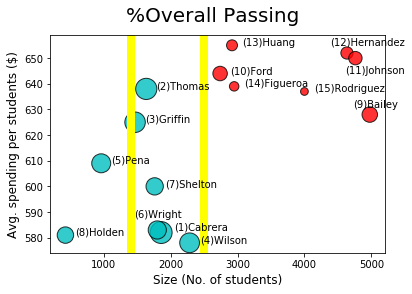

In [417]:
#Plot between number of students and budget
#Size: Ranking based on % of overall pass ->Bigger is towards successfull
#Color: Cyan: If more than 70% of the students passed overall, Red otherwise
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

#rank school based on overall passing percentage: keys<- school name; values <- rank; rank1<-worst, rank15<-best
performance = {name:index+1 for index,name in enumerate(school_summary_nf['% Overall Passing'].sort_values().index.to_list())}

ax.scatter(school_summary_nf['Total Students'], school_summary_nf['Per Student Budget'], s = [30+30*(performance[index]) for index in school_summary_nf['Total Students'].index.to_list()], c=['c' if grade >=70 else 'r' for grade in school_summary_nf['% Overall Passing'].to_list()], alpha=0.8, edgecolors='black')

line1 = mlines.Line2D([2500, 2500], [ax.get_ybound()[0], ax.get_ybound()[1]], color='yellow', linewidth=8)
line2 = mlines.Line2D([1400, 1400], [ax.get_ybound()[0], ax.get_ybound()[1]], color='yellow', linewidth=8)
ax.add_line(line1)
ax.add_line(line2)
for i,school_fn in enumerate(school_summary_nf['% Overall Passing'].index.to_list()):
    x_offset = 150
    y_offset=0
    school = school_fn.split()[0]
    if school == 'Johnson' :
        y_offset = -6
        x_offset = -150
    if (school == 'Hernandez') | (school == 'Bailey'):
        y_offset = 3
        x_offset = -250
    if school == 'Wright':
        y_offset = 5
        x_offset = -350
    if school == 'Cabrera':
        y_offset = 1
        x_offset = 200
    _ = ax.annotate(f"({16-performance[school_fn]}){school}", (school_summary_nf['Total Students'][i]+x_offset, school_summary_nf['Per Student Budget'][i]+y_offset))

fig.suptitle('%Overall Passing', fontsize=20)
plt.xlabel('Size (No. of students)', fontsize=12)
plt.ylabel('Avg. spending per students ($)', fontsize=12)


## Finding 2

* It seems like schools have pretty much consistent performance (%of students who passed in both math & reading) through all the grades. Maybe, same faculty is teaching across the grades!!! However, some schools have shown some leaps and falls through grades. Out of all the schools, only "Figueroa High School", "Ford High School", "Holden High School" and "Shelton High School" are showing more than 4% variation across grades. We need to enquire and find out what is changing across the grades for them.

In [418]:
#Create a group for all students, grouped by school name and grade
all_students_grp = school_data_complete.groupby(['school_name', 'grade'])
all_students_grade_wise = all_students_grp['student_name'].count()
#unstack to get grade index as column
all_students_grade_wise=all_students_grade_wise.unstack(level=1)
#Create a group for all passed students, grouped by school name and grade
passed_students_grp = school_data_complete.query('reading_score>=70 & math_score>=70').groupby(['school_name', 'grade'])
passed_students_grade_wise = passed_students_grp['student_name'].count()
#unstack to get grade index as column
passed_students_grade_wise=passed_students_grade_wise.unstack(level=1)
#Take non-formatted data for illustration
perf_schools_grade_nf = (100*passed_students_grade_wise.div(all_students_grade_wise)).applymap(lambda x: round(x,2))
#Format the data
perf_schools_grade = (100*passed_students_grade_wise.div(all_students_grade_wise)).applymap("{:.2f}%".format)
#Illustration
#To change to the right format for the graph
grade_school = perf_schools_grade_nf.T
grade_school.reset_index(inplace=True)
grade_school.columns.name=None
grade_school.grade = grade_school.grade.apply(lambda x: int(re.sub('th', '', x)))
grade_school = grade_school.sort_values(by='grade')
#grade_school.set_index('grade', inplace=True)
#grade_school

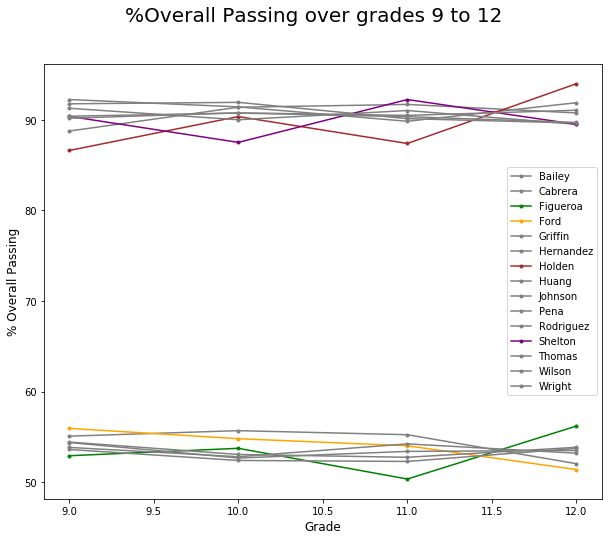

In [419]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1)
_= ax.set_prop_cycle(color=['grey', 'grey', 'green', 'orange', 'grey', 'grey', 'brown', 'grey',
       'grey', 'grey', 'grey', 'purple', 'grey', 'grey', 'grey'])

for col in grade_school.columns[1:]:
    _=ax.plot(grade_school['grade'], grade_school[col], marker = '.', label=col.split()[0])   

_=fig.suptitle('%Overall Passing over grades 9 to 12', fontsize=20)
_=plt.xlabel('Grade', fontsize=12)
_=plt.ylabel('% Overall Passing', fontsize=12)
_=plt.legend()
                                                                                                   
                                                                                                                                                                                                     
                                                                                                      

In [420]:
grade_school = grade_school.drop('grade', axis=1)
pd.DataFrame([grade_school.max(axis=0)-grade_school.min(axis=0)])

,Bailey High School,Cabrera High School,Figueroa High School,Ford High School,Griffin High School,Hernandez High School,Holden High School,Huang High School,Johnson High School,Pena High School,Rodriguez High School,Shelton High School,Thomas High School,Wilson High School,Wright High School
0,3.65,2.4,5.85,4.55,2.94,1.42,7.37,1.71,1.68,1.77,1.45,4.73,2.28,0.88,1.04


## Finding 3

* Though there are almost equal number of Charter and District schools, the former type has way more passing % compared to the latter. Also, note the avg size of the District schools. It is way more than the Charter schools. We should enquire about, why District schools perform bad, is it the size or some other hidden factor?

In [421]:
#We have school_summary_nf with %Overall Passing and School Type

school_type_DF = school_summary_nf.copy()
#Group by schoolType and take the avg %Overall Passing
school_type_grp = school_type_DF.groupby('School Type')
Type_DF = school_type_grp.aggregate({'Total Students':['count', 'mean'], '% Overall Passing':'mean'})
Type_DF.columns = ['Count', 'Size(Avg. No. of Students)', 'Avg. % Overall Passing']
Type_DF

,Count,Size(Avg. No. of Students),Avg. % Overall Passing
School Type,,,
Charter,8,1524.250000,90.432244
District,7,3853.714286,53.672208


## Finding 4

* ALL the schools have a better passing percentage in Reading compared to Mathematics. Across schools, while 89% of the students pass in reading, only 80% pass in mathematics. The low performing schools perform poorly in math, hence, the overall passing percentage drops. Authorities need to take some considerable measures to improve math in those schools.

In [422]:
schools_math_reading_DF = school_summary_nf.copy()
#Choose only required columns
schools_math_reading_DF=schools_math_reading_DF[["% Passing Math", "% Passing Reading", "% Overall Passing"]]
schools_math_reading_DF
schools_math_reading_DF.mean(axis=0)#Avg. of %passing

,% Passing Math,% Passing Reading,% Overall Passing
Bailey High School,66.680064,81.933280,54.642283
Cabrera High School,94.133477,97.039828,91.334769
Figueroa High School,65.988471,80.739234,53.204476
Ford High School,68.309602,79.299014,54.289887
Griffin High School,93.392371,97.138965,90.599455
Hernandez High School,66.752967,80.862999,53.527508
Holden High School,92.505855,96.252927,89.227166
Huang High School,65.683922,81.316421,53.513884
Johnson High School,66.057551,81.222432,53.539172
Pena High School,94.594595,95.945946,90.540541


% Passing Math       80.987054
% Passing Reading    89.219023
% Overall Passing    73.277560
dtype: float64